# Pedestrian Footfall Dataset Exploratory Analysis

Dataset: https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-2009-to-Present-counts-/b2ak-trbp

Note: you will need the Jupyer Lab plotly extension installed: https://plotly.com/python/getting-started

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from datetime import datetime
from pathlib import Path

import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

from utils import *
from plots import *


data_path = Path("../data/Pedestrian_Counting_System___2009_to_Present__counts_per_hour_.csv")

In [2]:
foot_df = load_and_clean_pedestrian_data(data_path)
foot_df.head()

ID               Date_Time  Year     Month  Mdate     Day  Time  \
0  2887628  11/01/2019 05:00:00 PM  2019  November      1  Friday    17   
1  2887629  11/01/2019 05:00:00 PM  2019  November      1  Friday    17   
2  2887630  11/01/2019 05:00:00 PM  2019  November      1  Friday    17   
3  2887631  11/01/2019 05:00:00 PM  2019  November      1  Friday    17   
4  2887632  11/01/2019 05:00:00 PM  2019  November      1  Friday    17   

   Sensor_ID                   Sensor_Name  Hourly_Counts            datetime  \
0         34          Flinders St-Spark La            300 2019-11-01 17:00:00   
1         39                  Alfred Place            604 2019-11-01 17:00:00   
2         37               Lygon St (East)            216 2019-11-01 17:00:00   
3         40  Lonsdale St-Spring St (West)            627 2019-11-01 17:00:00   
4         36               Queen St (West)            774 2019-11-01 17:00:00   

   datetime_flat_year  
0 2000-11-01 17:00:00  
1 2000-11-01 17:00:00  
2 2000-11-01 17:00:00  
3 2000-11-01 17:00:00  
4 2000-11-01 17:00:00

_Q: How many years does the data set cover?_

In [3]:
sorted(foot_df["Year"].unique())

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

_Q: How many sensors are in the dataset?

In [4]:
len(foot_df["Sensor_Name"].unique())

69

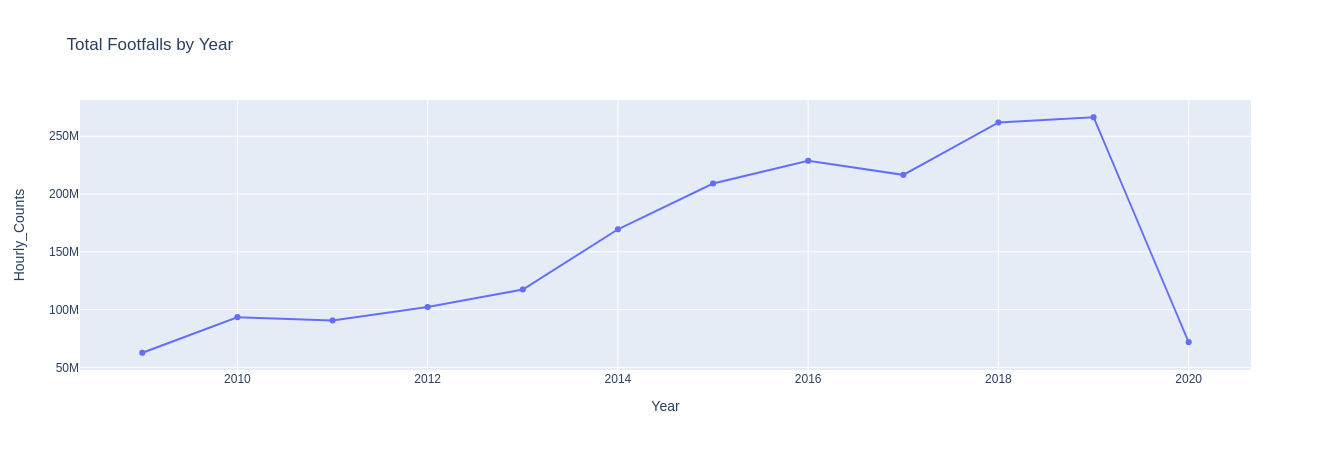

In [5]:
year_counts_df = foot_df.groupby("Year")["Hourly_Counts"].sum().reset_index()
px.line(year_counts_df, x="Year", y="Hourly_Counts", title="Total Footfalls by Year").update_traces(mode='lines+markers')

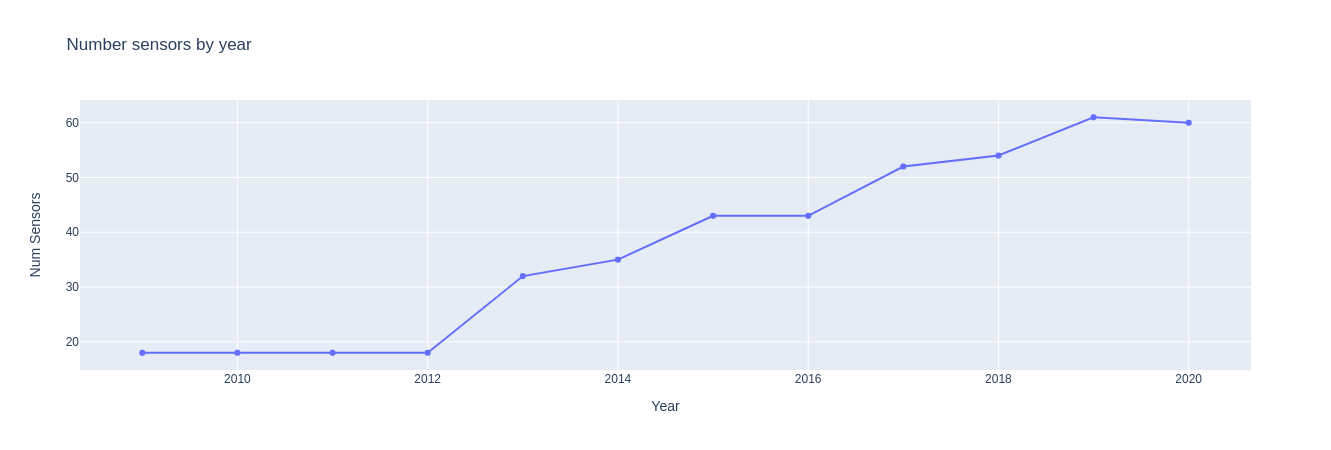

In [6]:
num_sensors_df = foot_df.groupby("Year")["Sensor_Name"].nunique().reset_index(name="Num Sensors")
px.line(num_sensors_df, x="Year", y="Num Sensors", title="Number sensors by year").update_traces(mode='lines+markers')

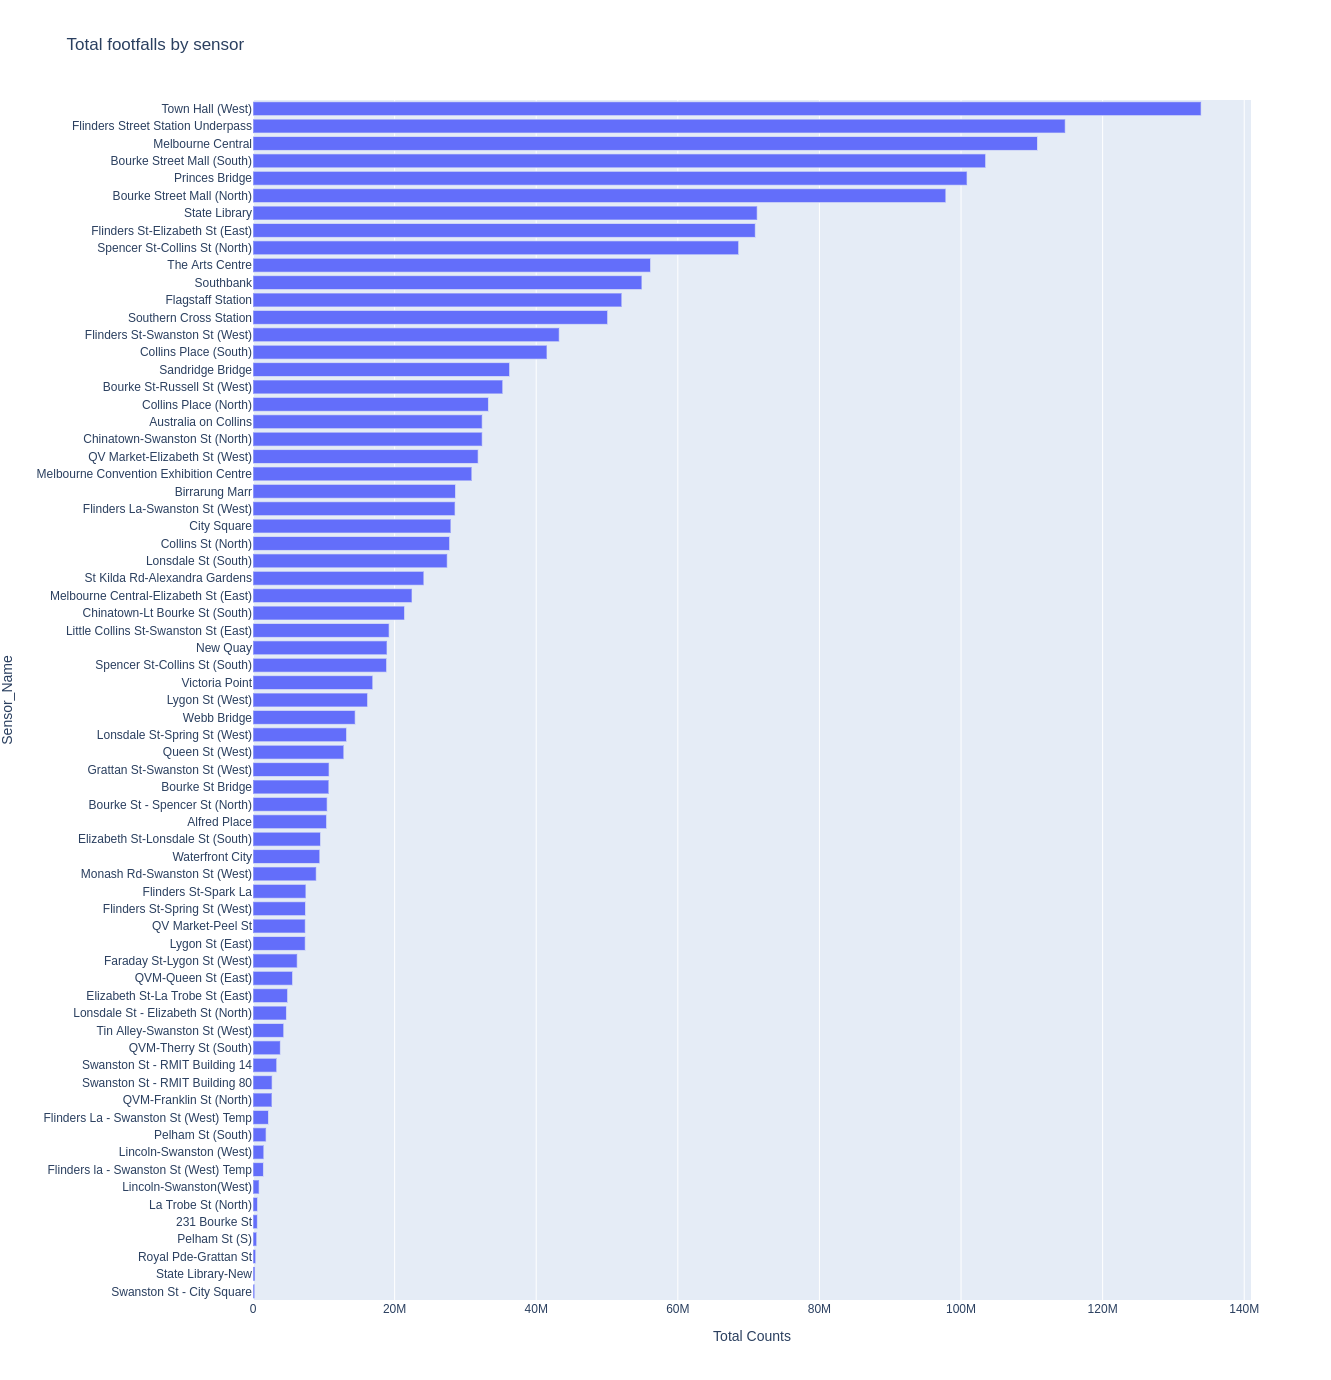

In [7]:
plot_sensor_counts(foot_df)

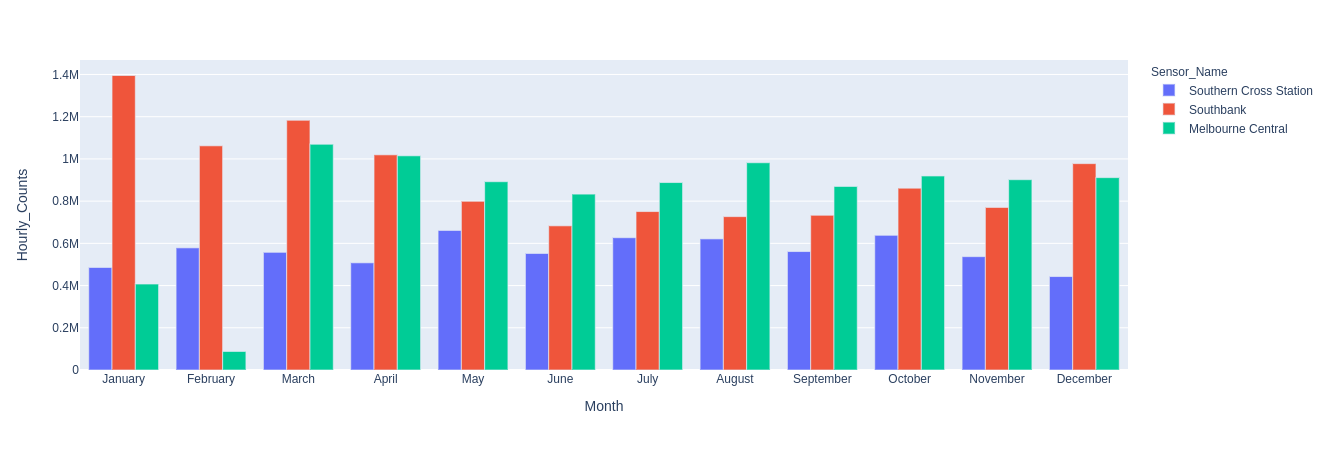

In [8]:
plot_month_counts(
    foot_df,
    year=2019,
    sensor=["Southbank", "Southern Cross Station", "Melbourne Central"],
)

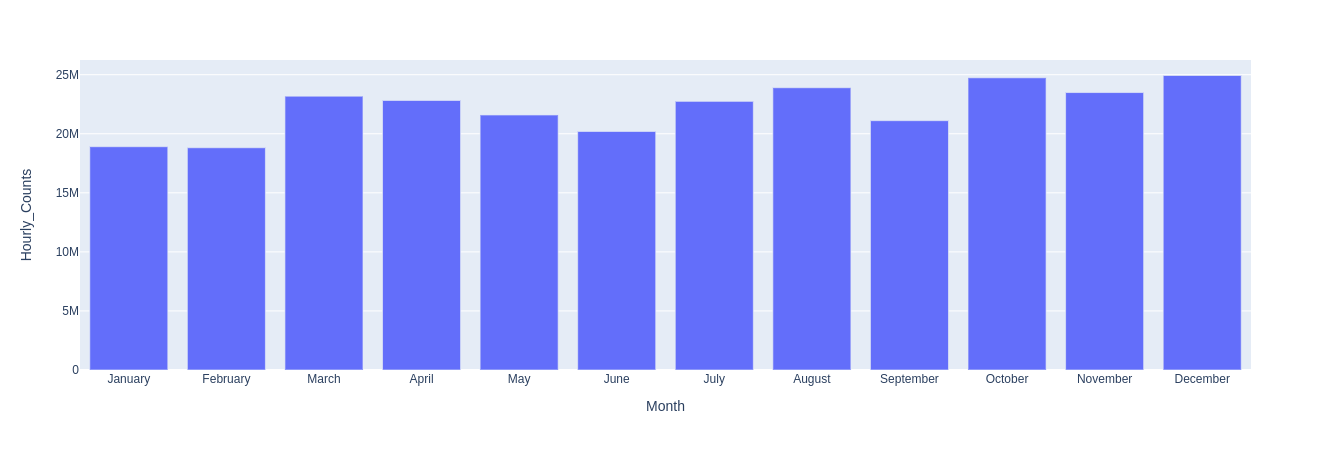

In [9]:
plot_month_counts(foot_df, year=2019)

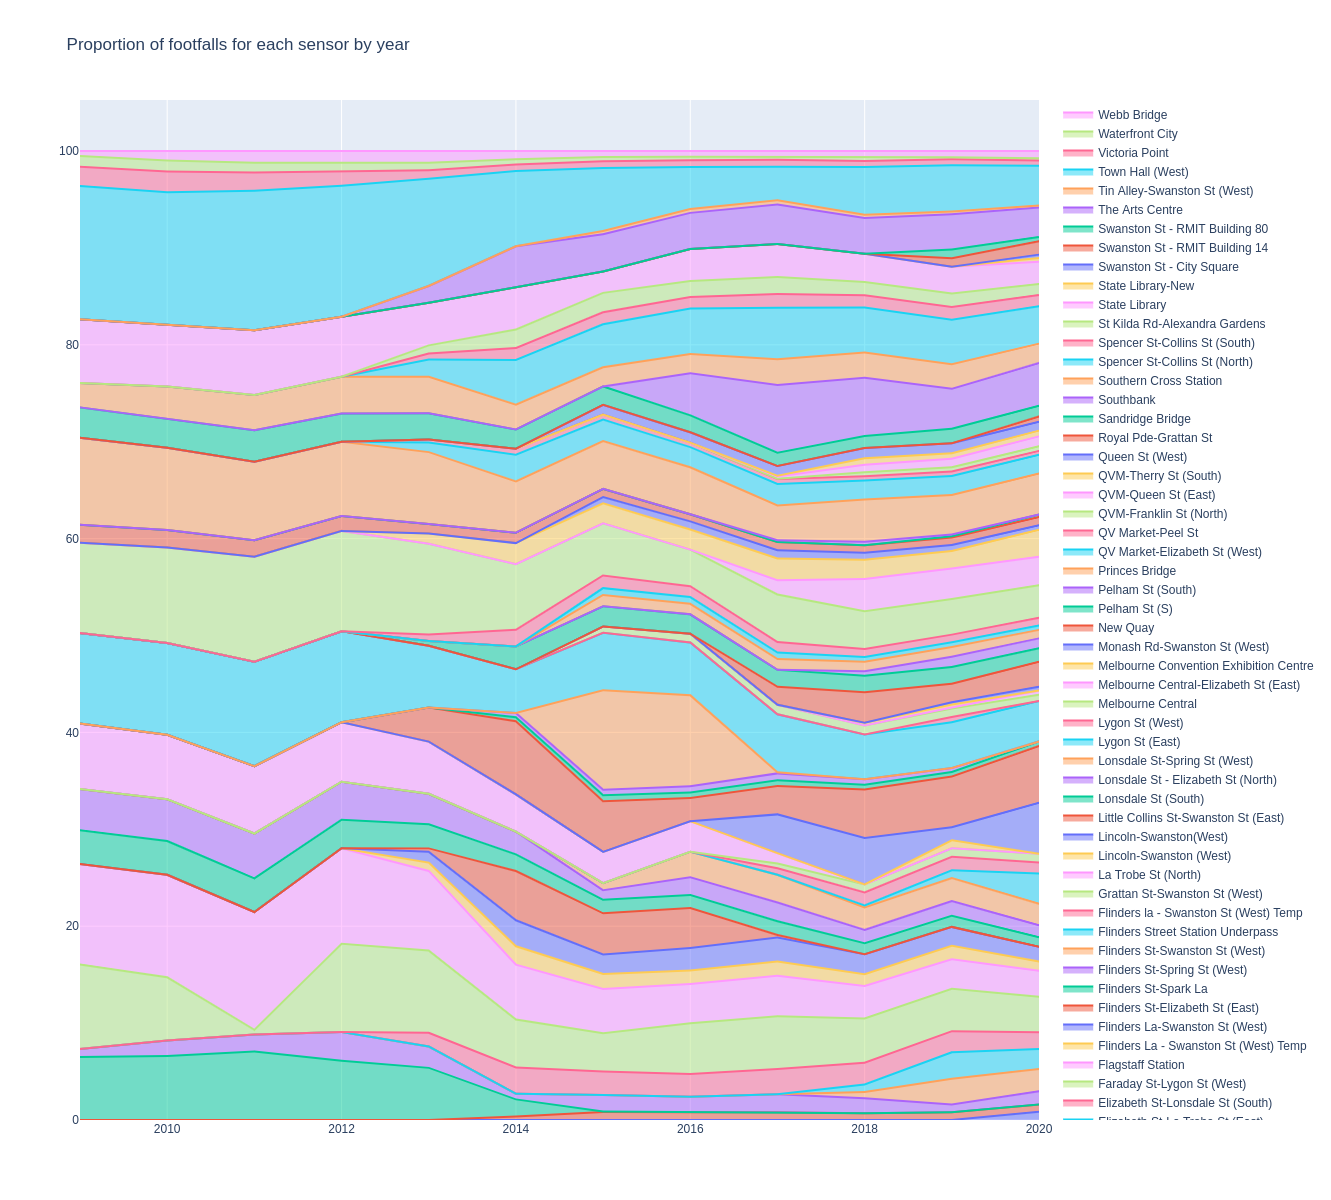

In [10]:
plot_stacked_sensors(foot_df)

## Geocoding



In [27]:
import geocoder
from config import GOOGLE_GEO_KEY
geo = geocoder.google('Melbourne, Australia', key=GOOGLE_GEO_KEY)
geo.latlng

[-37.8136276, 144.9630576]